In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
# Replace 'path_to_your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('C:/Users/HP/OneDrive/Documents/backupDocs/dev/Python mini Pro/All_Crypto.csv')

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(data.head())

First five rows of the dataset:
   Sno  Name Symbol              Date       High        Low       Open  \
0    1  Aave   AAVE  05-10-2020 23:59  55.112358  49.787900  52.675035   
1    2  Aave   AAVE  06-10-2020 23:59  53.402270  40.734578  53.291969   
2    3  Aave   AAVE  07-10-2020 23:59  42.408314  35.970690  42.399947   
3    4  Aave   AAVE  08-10-2020 23:59  44.902511  36.696057  39.885262   
4    5  Aave   AAVE  09-10-2020 23:59  47.569533  43.291776  43.764463   

       Close        Volume     Marketcap  
0  53.219243  0.000000e+00  8.912813e+07  
1  42.401599  5.830915e+05  7.101144e+07  
2  40.083976  6.828342e+05  6.713004e+07  
3  43.764463  1.658817e+06  2.202651e+08  
4  46.817744  8.155377e+05  2.356322e+08  


In [3]:
# Print the shape of the dataset
print(f"Dataset Shape: {data.shape}")

# List unique cryptocurrency names
cryptocurrencies = data['Name'].unique()
print(f"List of Cryptocurrencies ({len(cryptocurrencies)}):")
i=0
for currency in cryptocurrencies:
    i+=1
    print(i,currency)

Dataset Shape: (37082, 10)
List of Cryptocurrencies (23):
1 Aave
2 Binance Coin
3 Bitcoin
4 Cardano
5 Chainlink
6 Cosmos
7 Crypto.com Coin
8 Dogecoin
9 EOS
10 Ethereum
11 IOTA
12 Litecoin
13 Monero
14 NEM
15 Polkadot
16 Solana
17 Stellar
18 Tether
19 TRON
20 Uniswap
21 USD Coin
22 XRP
23 Wrapped Bitcoin


In [4]:
# Basic data information
print("\nData Information:")
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ MB
None


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Sno          High           Low          Open         Close  \
count  37082.000000  37082.000000  37082.000000  37082.000000  37082.000000   
mean   18541.500000   1016.058015    952.987707    985.323755    987.120511   
std    10704.795678   5249.503670   4907.932082   5088.101367   5093.703878   
min        1.000000      0.000089      0.000079      0.000086      0.000086   
25%     9271.250000      0.075664      0.069536      0.072456      0.072648   
50%    18541.500000      1.008733      0.999850      1.001157      1.001138   
75%    27811.750000     31.916399     28.996246     30.459673     30.512205   
max    37082.000000  64863.098910  62208.964370  63523.754870  63503.457930   

             Volume     Marketcap  
count  3.708200e+04  3.708200e+04  
mean   3.022470e+09  1.542868e+10  
std    1.190924e+10  7.058381e+10  
min    0.000000e+00  0.000000e+00  
25%    4.937190e+06  2.395955e+08  
50%    8.512805e+07  1.405335e+09  
75%    9.388489

In [7]:
#getting rid of distortions with dynamically sized plots by plotly lib
import plotly.graph_objects as go

# Example: Assuming 'data' is a DataFrame with 'Date' and 'Daily Return' columns
# Convert 'Date' to datetime if it isn't already
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Remove rows with NaT in 'Date'
data = data.dropna(subset=['Date'])

# Create an interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data['Date'],
    y=data['Daily Return'],
    mode='lines',
    name='Daily Return',
    line=dict(color='blue')
))

# Customize layout
fig.update_layout(
    title="Interactive Daily Returns of Cryptocurrency",
    xaxis_title="Date",
    yaxis_title="Daily Return",
    template="plotly_dark",  # Optional: Use a dark theme
    hovermode="x unified"    # Show tooltip for x-axis values
)

# Show the plot
fig.show()

In [ ]:

print(data.dtypes)
#Filtering out non-numeric columns ensures that only valid data is included in the correlation computation.
numeric_data = data.select_dtypes(include=[np.number])


Sno                      int64
Name                    object
Symbol                  object
Date            datetime64[ns]
High                   float64
Low                    float64
Open                   float64
Close                  float64
Volume                 float64
Marketcap              float64
Daily Return           float64
dtype: object


In [ ]:
# Correlation matrix to analyze relationships between different cryptocurrencies
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Display the first few rows with new calculations for reference
data[['Date', 'Volatility (%)', 'Daily Volatility', 'Daily Return', 'Close']].head()

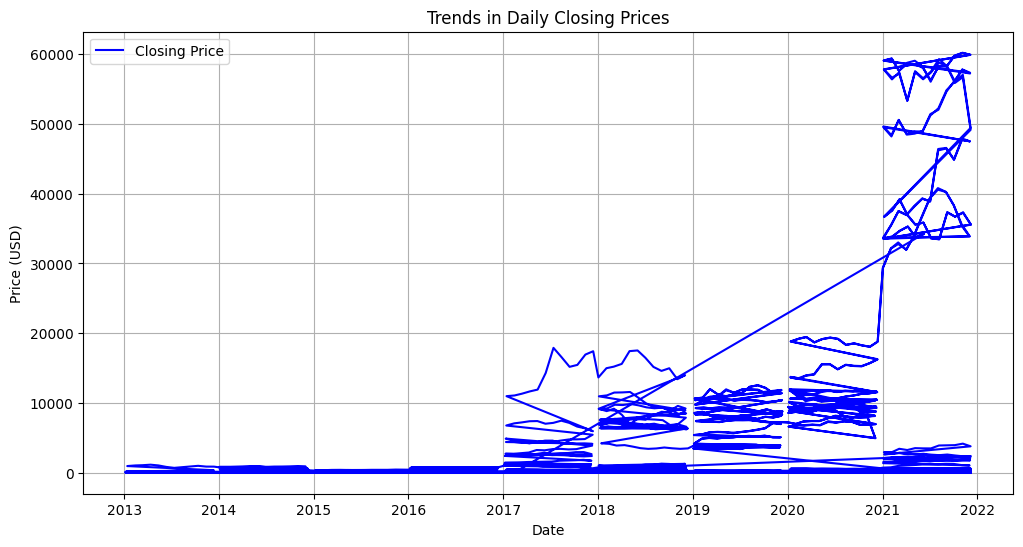

In [14]:
# Analyze trends in closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
plt.title('Trends in Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

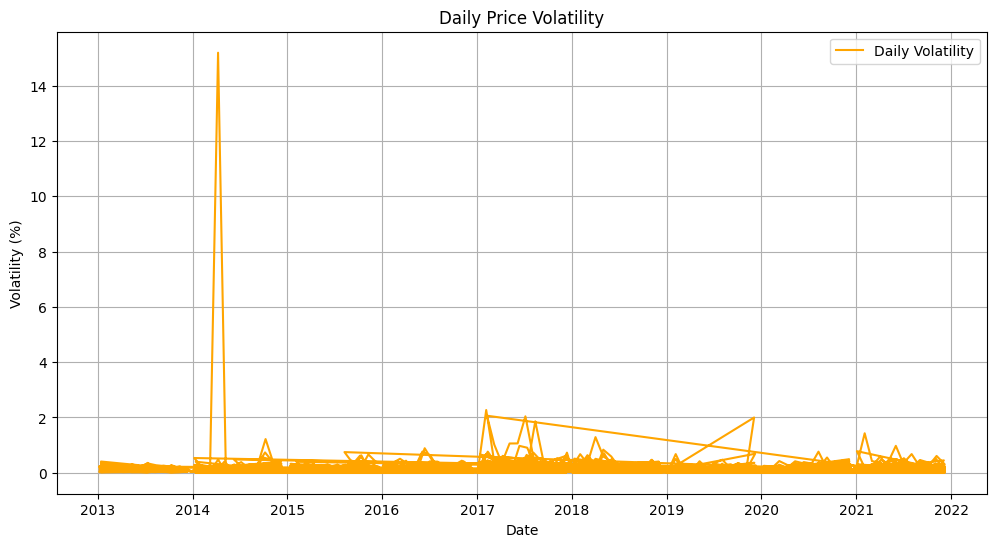

In [15]:
# -------------------------------
# 1. Monitor Price Volatility
# -------------------------------

data['Daily Price Range'] = data['High'] - data['Low']
data['Daily Volatility'] = (data['Daily Price Range']) / data['Open']
data['Volatility (%)'] = data['Daily Volatility'] * 100
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Volatility'], label='Daily Volatility', color='orange')
plt.title('Daily Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid()
plt.show()

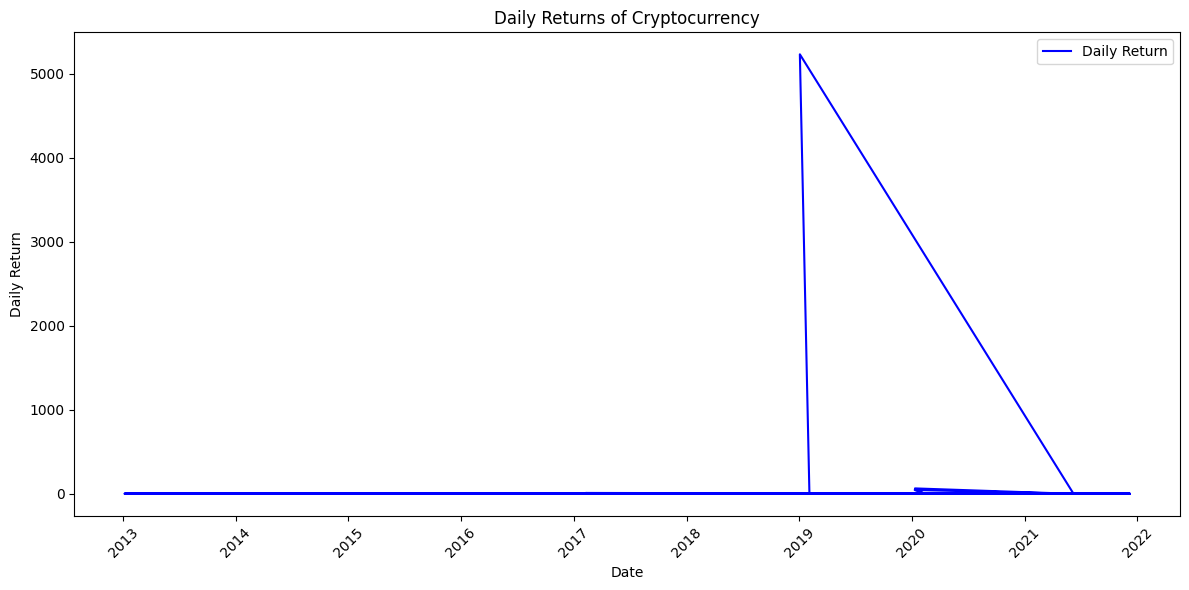

In [16]:
# -------------------------------
# 2. Calculate Investment Returns
# -------------------------------

# Analyzing daily returns for a specific cryptocurrency (e.g., Bitcoin)
data['Daily Return'] = data['Close'].pct_change()

# Plotting Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Return'], label='Daily Return', color='blue')


# Add title and labels
plt.title('Daily Returns of Cryptocurrency')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

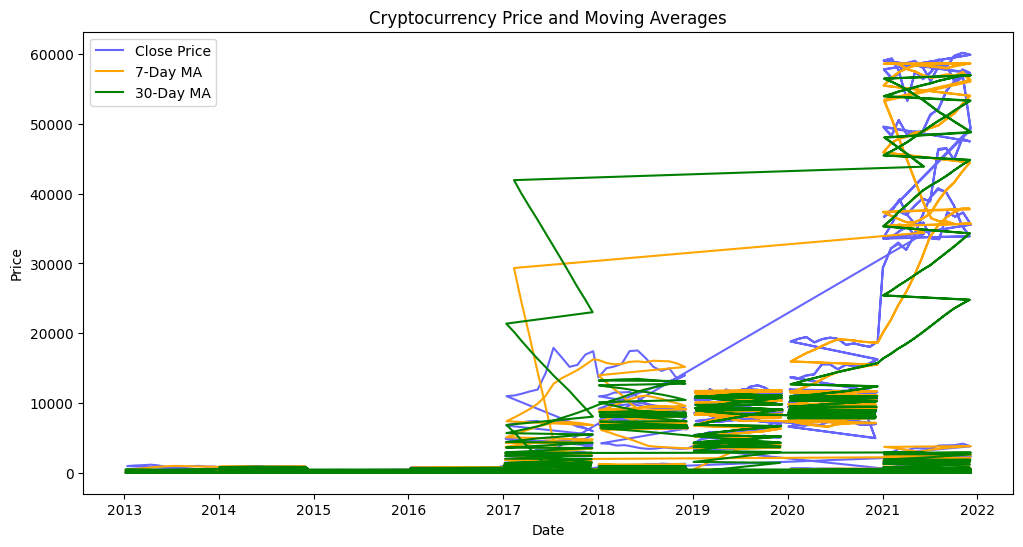

In [17]:
# -------------------------------
# 3. Analyze Trends
# -------------------------------
# Calculate moving averages
data['7-Day MA'] = data['Close'].rolling(window=7).mean()
data['30-Day MA'] = data['Close'].rolling(window=30).mean()

# Plot Close price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(data['Date'], data['7-Day MA'], label='7-Day MA', color='orange')
plt.plot(data['Date'], data['30-Day MA'], label='30-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Price and Moving Averages')
plt.legend()
plt.show()


Correlation Matrix:
                        Sno      High       Low      Open     Close    Volume  \
Sno                1.000000 -0.006858 -0.006862 -0.006990 -0.006937  0.011620   
High              -0.006858  1.000000  0.999278  0.999562  0.999600  0.283701   
Low               -0.006862  0.999278  1.000000  0.999406  0.999477  0.281449   
Open              -0.006990  0.999562  0.999406  1.000000  0.999007  0.282826   
Close             -0.006937  0.999600  0.999477  0.999007  1.000000  0.283078   
Volume             0.011620  0.283701  0.281449  0.282826  0.283078  1.000000   
Marketcap         -0.179541  0.686372  0.685900  0.685915  0.686735  0.484596   
Daily Return       0.013766  0.003804  0.003985  0.003887  0.003890 -0.002172   
Daily Price Range -0.005752  0.856333  0.836097  0.848273  0.847844  0.270770   
Daily Volatility  -0.040146 -0.024519 -0.026834 -0.025613 -0.025521 -0.042678   
Volatility (%)    -0.040146 -0.024519 -0.026834 -0.025613 -0.025521 -0.042678   
7-Day M

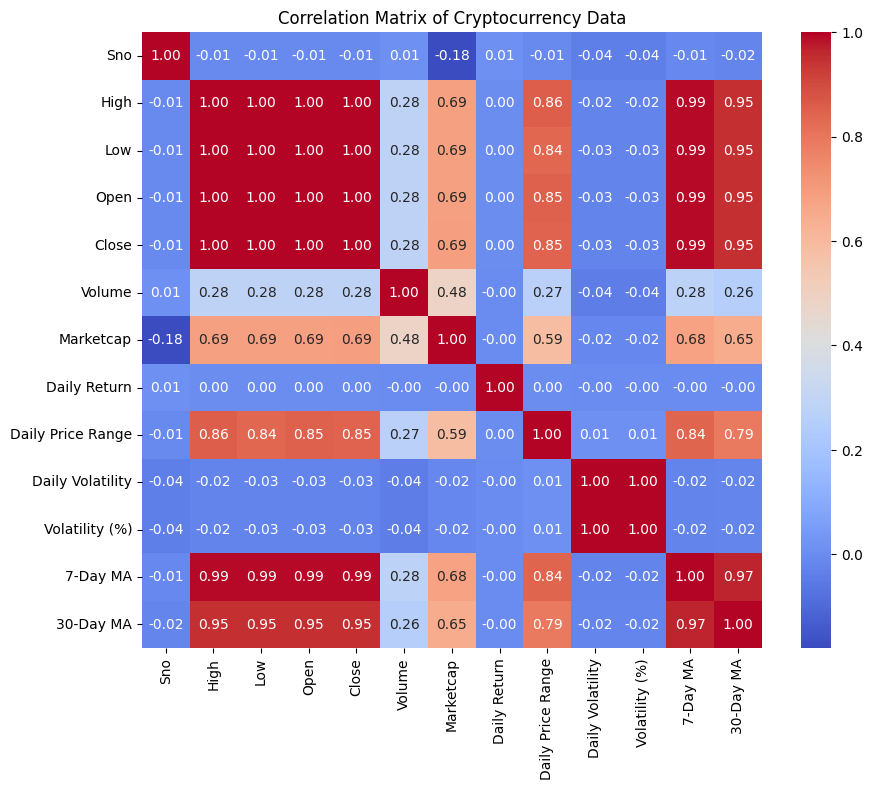

In [18]:
# -------------------------------
# 4. Study Correlations
# -------------------------------

#Filtering out non-numeric columns ensures that only valid data is included in the correlation computation.
#numeric_data = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
numeric_data = data.select_dtypes(include=[np.number])

# Filter numeric columns for correlation analysis

correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Cryptocurrency Data')
plt.show()

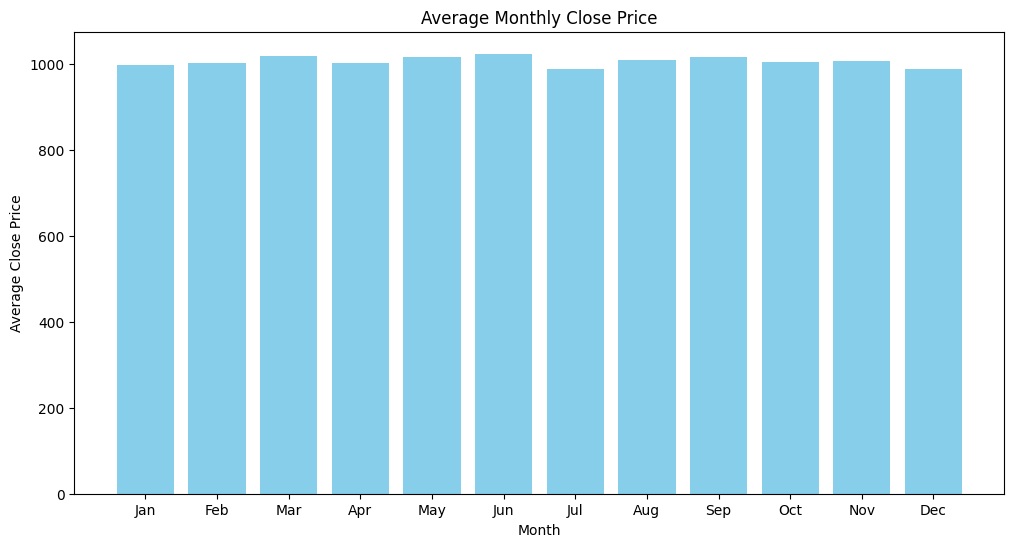

In [19]:
# -------------------------------
# 5. Seasonal or Periodic Patterns
# -------------------------------
# Extract month from the date for grouping
data['Month'] = data['Date'].dt.month

# Group by month and calculate average close price
monthly_avg = data.groupby('Month')['Close'].mean()

# Plot monthly average close price
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.title('Average Monthly Close Price')
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

In [20]:
# -------------------------------
# Save Processed Data (Optional)
# -------------------------------
processed_file = 'C:/Users/HP/OneDrive/Documents/backupDocs/dev/Python mini Pro/Processed_Crypto_Data.csv'
data.to_csv(processed_file, index=False)
print(f"Processed data saved to {processed_file}")

Processed data saved to C:/Users/HP/OneDrive/Documents/backupDocs/dev/Python mini Pro/Processed_Crypto_Data.csv
